<a href="https://colab.research.google.com/github/KIVILCIIM/Data-Science/blob/main/Python_ML_Hiyerar%C5%9Fik_K%C3%BCmeleme_Y%C3%B6ntemi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Kütüphaneyi içe aktar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Veri setini oluşturalım

# Küme 1
x1 = np.random.normal(25,5,20) #25 ortalamallı standat sapması 5 olan 20 nokta oluşturuldu
y1 = np.random.normal(25,5,20)

# Küme 2
x2 = np.random.normal(55,5,20)
y2 = np.random.normal(60,5,20)

# Küme 3
x3 = np.random.normal(55,5,20)
y3 = np.random.normal(15,5,20)


x = np.concatenate((x1,x2,x3), axis = 0) #tüm satıları tek değişkene atadık
y= np.concatenate((y1,y2,y3), axis = 0)

dictionary = {"x": x, "y": y}

data = pd.DataFrame(dictionary)
data.head()

,x,y
0,31.621953,21.033510
1,28.587559,29.934969
2,13.008183,32.853890
3,20.269131,21.837007
4,26.234204,28.900233


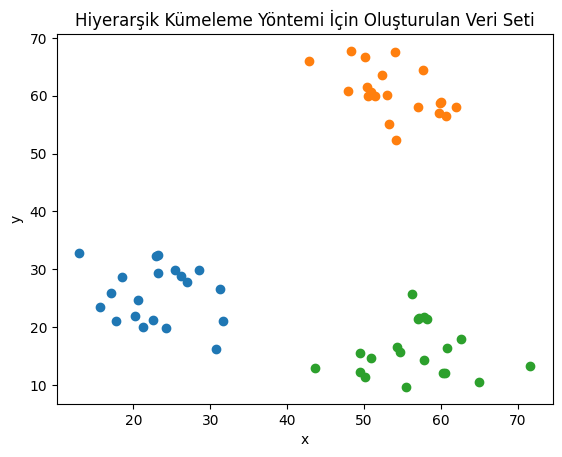

In [ ]:
plt.figure()
plt.scatter(x1,y1)
plt.scatter(x2,y2)
plt.scatter(x3,y3)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Hiyerarşik Kümeleme Yöntemi İçin Oluşturulan Veri Seti")
plt.show()

**Dendrogram Gösterimi**

Veri nokalarının birbirine uzaklığını dendrogram ile görebilriiz.

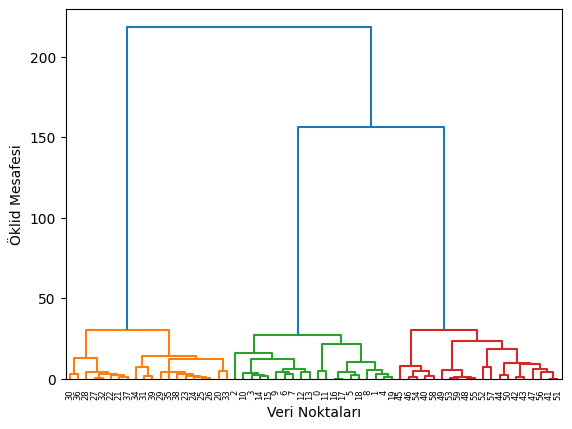

In [ ]:
# %%dendrogram
from scipy.cluster.hierarchy import linkage, dendrogram

merg = linkage(data,method="ward") #bağlaşımlar "ward" tekniği ile yapıldı
dendrogram(merg,leaf_rotation = 90)
plt.xlabel("Veri Noktaları")
plt.ylabel("Öklid Mesafesi")
plt.show()

**Hiyerarşik kümeleme algoritması eğitimi ve testi**

Hiyerarşik Kümeleme yöntemini 3 adet küme oluşturması için eğitip, testini yapıp sonrasında görselleştirme yapılacak.

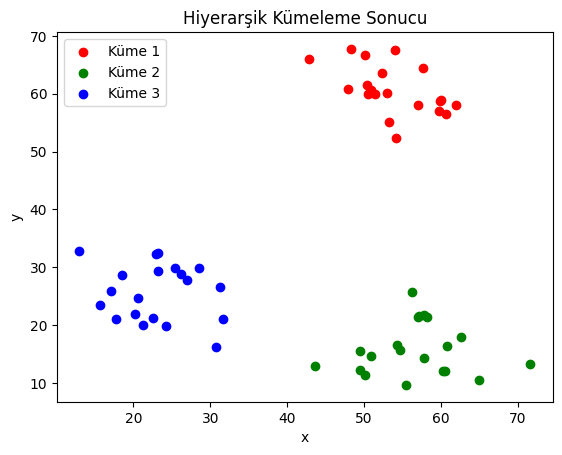

In [ ]:
from sklearn.cluster import AgglomerativeClustering

hiyerarsi_kume = AgglomerativeClustering(n_clusters=3,  linkage="ward")
kume = hiyerarsi_kume.fit_predict(data)
# fit_predict her bir noktanın hangi kümeye ait olduğuna dair tahmini verir, indeksler 0'dan başlar
data["label"] = kume

plt.figure()
plt.scatter(data.x[data.label == 0], data.y[data.label == 0], color = "red", label = "Küme 1")
plt.scatter(data.x[data.label == 1], data.y[data.label == 1], color = "green", label = "Küme 2")
plt.scatter(data.x[data.label == 2], data.y[data.label == 2], color = "blue", label = "Küme 3")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.title("Hiyerarşik Kümeleme Sonucu")
plt.show()